# I. Introduction

### Final Project

- Study Group 4 Hacktiv8, Batch 011 Full Time Data Science
- Our team :
  - Megatheo J. Rumahorbo
  - Aditya Vianseto
  - Hafiz Febry
  - Nabila Edelliana K

## Objectives
This Project aims to create a user-friendly chatbot (GitCoff" for e-commerce "GitCoffee" to help communicating with customers in the more effective way for non-technical question with the concept of machine learning and NLP.

## Dataset
We build our own dataset in order to have a relevan dataset and in to complete the aims of the objectives.
1. Intents : contains 3 informations, dataset for the chatbot
    - tag : defines the class of the question/input and the answer/output.
    - pattern : the data that represent the input for GitCoff from user/customer and will be trained later to the model.
    - responses : defines the responses that will be selected randomly as the output for the input.
2. data_kopi.csv : contains 5 informations, dataset for recommeder system.

# II. Import Library

In [200]:
# Import library that will be used in this project

# Library for Visualization
import matplotlib.pyplot as plt

# Library for preprocessing
import string
import re
import numpy as np
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Library for modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from util import JSONParser
from sklearn.model_selection import train_test_split

# Library for model evaluation
from sklearn import metrics

# Data Loading

In [201]:
# Load data from folders
path = "dataset/intents.json"

# Defining JSONParser
jp = JSONParser()

# Parsing data intents
jp.parse(path)

# Building dataframe and save it to variable df
df = jp.get_dataframe()

In [202]:
df

,text_input,intents
0,Hai,menyapa
1,Halo,menyapa
2,Hei,menyapa
3,Oi,menyapa
4,Woy,menyapa
...,...,...
1028,Kopi yang paling mahal dijual disini ada gak sih?,kopi_mahal
1029,jenis kopi yang harganya paling mahal ada gak?...,kopi_mahal
1030,Punya kopi yang harganya paling mahal kan,kopi_mahal
1031,Punya kopi termahal kan? kasih tau aku bisa?,kopi_mahal


There are 1003 data with 2 columns. Note that will be using `intents` as our target when modelling the data.

In [203]:
print("Intent count : ",df.intents.nunique())

Intent count :  33


Data Skewness Score : 1.5243594136950154


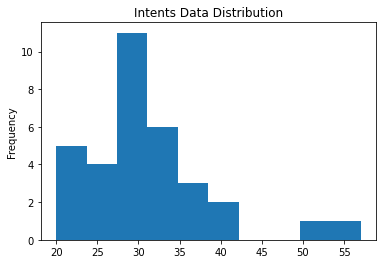

In [204]:
print("Data Skewness Score :",df.intents.value_counts().skew())
df.intents.value_counts().plot(kind='hist')
plt.title("Intents Data Distribution")
plt.show()

Right skew

# III. Data Preprocessing

### 3.1. Data Cleaning

In [205]:
# Look into sample chat
sample_chat = df.text_input[500]
sample_chat

'Produk yang dijual apa aja ya? banyak ga?'

It looks like we need some data cleaning because we want "Produk yang dijual apa aja ya? banyak ga?" has no difference with "produk yang dijual apa aja ya? banyak ga?" as the model will read the data in case-sensitive.

In [206]:
# Transforming the chat into lowercase
chat_lower = sample_chat.lower()
chat_lower

'produk yang dijual apa aja ya? banyak ga?'

In [207]:
# Remove punctuations from the chat
chat_punct = chat_lower.translate(str.maketrans("","",string.punctuation))
chat_punct

'produk yang dijual apa aja ya banyak ga'

In [208]:
# We need to change non-alphabetical characters with spaces too to make the data cleaner.
chat_punct = re.sub("[^A-Za-z\s']"," ", chat_punct)
chat_punct

'produk yang dijual apa aja ya banyak ga'

In [209]:
# Remove tab, in case the customer is mistype inputting tab on their chat
chat_punct = chat_punct.strip()
chat_punct

'produk yang dijual apa aja ya banyak ga'

In [210]:
# Defining Stemmer
stemmer = StemmerFactory().create_stemmer()

# Applying stemmer to the chat
output   = stemmer.stem(chat_punct)
output

'produk yang jual apa aja ya banyak ga'

We don't remove stopword because in our data, there are much of words that is important to detect tag. For example, the word "hai" is treated as stopwords in indonesian stopwords. Since the word "hai" is in the tag "menyapa", we don't want to remove it.

In [211]:
# Create function to case folding corpus in the dataframe
def document_processing(document):
    # Transform Document Into Lowercase
    document = document.lower()

    # Remove Punctuation From Document
    document = document.translate(str.maketrans("","",string.punctuation))

    # Remove Digit From Document
    document = re.sub("[^A-Za-z\s']"," ", document)

    # Remove Tab From Document
    document = document.strip()

    #Stemmer
    stemmer = StemmerFactory().create_stemmer()

    # stemming process
    document = stemmer.stem(document)

    return document

### 3.2. Data Splitting

In [212]:
# Split between data (X) and target (y)
X = df.text_input
y = df.intents

In [213]:
# Do Preprocessing text with Case Folding Function
X_proc = X.apply(document_processing)

### 3.3. Word Vectorization

Vectorization is converting chats into vector form so that they can be used for further processing. The token length in the vector is defined from the most words in a single chat in the data.

In [214]:
# Define text Vectorizer
vect = CountVectorizer()
vect.fit(X_proc)

CountVectorizer()

In [215]:
# Split Data for Train-Set and Test-Set
X_train, X_test,  y_train, y_test = train_test_split(X_proc, y,test_size=0.2, random_state=4)
print(f"Train-Set shape      : {len(X_train),len(y_train)}")
print(f"Test-Set shape       : {len(X_test),len(y_test)}")

Train-Set shape      : (826, 826)
Test-Set shape       : (207, 207)


we have 826 data for train-set and 207 data for test-set

# IV. Model Training

Training using pipeline as a container for vectorizer and the model

In [216]:
# MultinomialNB Pipeline
nb = make_pipeline(CountVectorizer(),
                   MultinomialNB())

# Training
nb.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [217]:
# Random Forest Pipeline
rf = make_pipeline(CountVectorizer(),
                   RandomForestClassifier())

# Training
rf.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [218]:
# Decision Tree Pipeline
dt = make_pipeline(CountVectorizer(),
                   DecisionTreeClassifier())

# Training
dt.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

# V. Model Evaluation

## 5.1. Model Evaluation for MultinomialNB

In [219]:
y_train_pred_nb = nb.predict(X_train)
y_test_pred_nb = nb.predict(X_test)
print("Train-Set Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_train_pred_nb, y_train)*100)
print("Test-Set Multinomial Naive Bayes model accuracy(in %) :", metrics.accuracy_score(y_test_pred_nb, y_test)*100)

Train-Set Multinomial Naive Bayes model accuracy(in %): 97.21549636803874
Test-Set Multinomial Naive Bayes model accuracy(in %) : 80.19323671497585


## 5.2. Model Evaluation for Decision Tree

In [220]:
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)
print("Train-Set Decision Tree model accuracy(in %):", metrics.accuracy_score(y_train_pred_dt, y_train)*100)
print("Test-Set Decision Tree model accuracy(in %) :", metrics.accuracy_score(y_test_pred_dt, y_test)*100)

Train-Set Decision Tree model accuracy(in %): 100.0
Test-Set Decision Tree model accuracy(in %) : 85.5072463768116


## 5.3. Model Evaluation for Random Forest

In [221]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
print("Train-Set Random Forest model accuracy(in %):", metrics.accuracy_score(y_train_pred_rf, y_train)*100)
print("Test-Set Random Forest model accuracy(in %) :", metrics.accuracy_score(y_test_pred_rf, y_test)*100)

Train-Set Random Forest model accuracy(in %): 100.0
Test-Set Random Forest model accuracy(in %) : 85.99033816425121


It turns out that the best model goes to MultinomialNB where the accuracy for training and test set are quiate good and the model is goodfit since the difference for the accuracy in training and test is not too big.

# VI. Building Chatbot

We use the while-loop concept to build the chatbot. We set the threshold at <0.2 is for the unknown input. For example, the chat that is out of topic will be treated as unknown input.

In [222]:
print("Anda Terhubung dengan chatbot Kami")
while True:
    # input user
    chat = input("Saya : ")
    # Preprocessing
    chat_processed = document_processing(chat)
    # Intent prediction (tag)
    res = nb.predict_proba([chat_processed])
    # get the probability value and its location
    max_prob = max(res[0])
    max_idx = np.argmax(res[0])
    
    # Define condition for unknown input
    print("Saya :",chat)
    if max_prob < 0.20:
        print("Bot  : Maaf Kak, aku masih gak ngerti maksud kakak ):")
    # Define condition to give response towards specific tag
    else:
        print(f"Bot  : {jp.get_response(nb.classes_[max_idx])}\n")
    # Define response to end the chat for tag "menutup"
    if nb.classes_[max_idx] == 'menutup':
        break
    

Anda Terhubung dengan chatbot Kami
Saya : hai
Bot  : Hai kak! ada yang mau ditanyakan?

Saya : nama kamu siapa si?
Bot  : Salam kenal kak, aku Gitcoff

Saya : oke gitcoff, ini toko apa sih?
Bot  : Git Coffee menjual berbagai macam kopi siap saji produksi sendiri nih kak. Ada kopi arabica, robusta, luwak, latte, macchiato, dan ada juga kopi dengan berbagai rasa lainnya. Silakan melihat katalog kami yaa untuk lebih lengkapnya di www.Git Coffee.com (:

Saya : jualan apa aja kamu?
Bot  : Disini kita jual produk kopi dalam bentuk bubuk kak, ada beberapa jenisnya seperti kopi arabica, robusta, luwak, latte, macchiato, dan ada juga kopi dengan berbagai rasa lainnya. Oiya, kalau kakak ingin tau lebih lanjut mengenai produk yang kita jual, bisa klik tautan ini ya kak www.git-coffee.com/produk

Saya : nanti cara bayarnya gemana?
Bot  : Hai kak jika sudah selesai melakukan pesanan dan ingin melakukan pemembayaran, instruksinya bisa kakak cek di www.git-coffee.com/metode-pembayaran, kakak juga bis

It seems that our chatbot is succesfully worked. But there's several things that we want to improve :
1. Upgrade the chatbot to be flexible when user respond the answer given by the chat bot, and at the same time giving the chatbot another question/input.
2. Upgrade the chatbot to have memories over previous chat to make the chatbot to be more user-friendly.